In [1]:
!pip install qiskit-ignis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.7/198.7 kB 127.3 kB/s eta 0:00:0000:01

[notice] A new release of pip available: 23.1.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


Title : Tackle Noise with Error Correction

/tmp/ipykernel_120/3904565391.py:20: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = backend.run(qobj)


Original Counts : {'111': 542, '000': 458}
Mitigated Counts : {'000': 458.00000003715667, '111': 541.9999999647916}


/tmp/ipykernel_120/3904565391.py:26: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  cal_job = backend.run(assemble(cal_circuits, backend=backend))


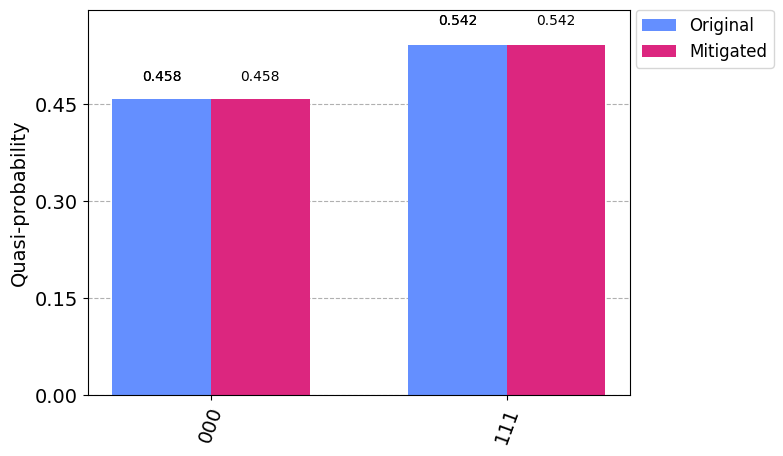

In [13]:
from qiskit import QuantumCircuit, assemble, Aer, transpile
from qiskit.visualization import plot_histogram
from qiskit.ignis.mitigation.measurement import CompleteMeasFitter, complete_meas_cal, tensored_meas_cal

# Define the quantum circuit
qc = QuantumCircuit(3, 3)

# Apply gates and operations to the circuit
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.measure([0, 1, 2], [0, 1, 2])

# Transpile the circuit
backend = Aer.get_backend('qasm_simulator')
transpiled_qc = transpile(qc, backend)

# Simulate the noisy circuit
qobj = assemble(transpiled_qc, shots=1000)
job = backend.run(qobj)
result = job.result()
counts = result.get_counts()

# Perform error mitigation
cal_circuits, state_labels = complete_meas_cal(qubit_list=[0, 1, 2])
cal_job = backend.run(assemble(cal_circuits, backend=backend))
cal_results = cal_job.result()
meas_fitter = CompleteMeasFitter(cal_results, state_labels)
mitigated_counts = meas_fitter.filter.apply(counts)

# Print the original counts
print(f"Original Counts : {counts}")

# Print the mitigated counts
print(f"Mitigated Counts : {mitigated_counts}")

# Plot the histograms of the original and mitigated counts
plot_histogram([counts, mitigated_counts], legend=['Original', 'Mitigated'])